### PROJETO DE OTIMIZAÇÃO 
- ALUNAS : Isabelly Rodrigues E Maria Carolina
- DESCRIÇÃO : Analisar a aplicação do modelo de Markowitz na construção de uma carteira composta por trinta ativos, verificando a melhor alocação que minimize o risco para um dado nível de retorno esperado, por meio da determinação da fronteira eficiente.

In [2]:
from pyomo.environ import SolverFactory

print("\n--- Verificação da Instalação ---")
print("Pyomo instalado com sucesso.")

# Verifique se o Ipopt está disponível
ipopt_solver = SolverFactory("ipopt")
print(f"Ipopt disponível para Pyomo: {ipopt_solver.available()}")

if ipopt_solver.available():
    print("O solver Ipopt está pronto para ser usado.")
else:
    print("O solver Ipopt não foi encontrado. Verifique a instalação.")



--- Verificação da Instalação ---
Pyomo instalado com sucesso.
Ipopt disponível para Pyomo: False
O solver Ipopt não foi encontrado. Verifique a instalação.


In [3]:
#Acho legal a gente escolher as trinta empresas com base em cada setor 

import pandas as pd
import yfinance as yf
import os

# --- Listas de tickers por setor ---
tickers_Financeiro = [
    'ITUB4.SA', 'BBDC4.SA', 'B3SA3.SA', 'ITSA4.SA', 'BBAS3.SA'
]
tickers_Energia = [
    'EQTL3.SA', 'CMIG4.SA', 'CPFE3.SA', 'EGIE3.SA', 'ENGI3.SA'
]
tickers_Industriais = [
    'AZUL4.SA', 'MRVE3.SA', 'SBSP3.SA', 'ECOR3.SA', 'WEGE3.SA'
]
tickers_Consumo = [
    'ABEV3.SA', 'MGLU3.SA', 'LREN3.SA', 'CVCB3.SA', 'BRFS3.SA'
]
tickers_Tecnologia = [
    'LWSA3.SA', 'POSI3.SA', 'TOTS3.SA', 'VIVT3.SA', 'MLAS3.SA'
]
tickers_Saude = [
    'HAPV3.SA', 'QUAL3.SA', 'RDOR3.SA', 'FLRY3.SA', 'DASA3.SA'  
]

# Junta todos os tickers em uma lista única
todos_tickers = (
    tickers_Financeiro + tickers_Energia +
    tickers_Industriais + tickers_Consumo +
    tickers_Tecnologia + tickers_Saude
)

# --- Parâmetros de data ---
# atualizado para 2 anos
data_inicio = "2023-10-01"
data_fim = "2025-09-30"

# --- Baixar dados ---
try:
    dados = yf.download(todos_tickers, start=data_inicio, end=data_fim, group_by="ticker")
except Exception as e:
    print(f"Ocorreu um erro ao baixar os dados: {e}")
    dados = None

if dados is not None and not dados.empty:
    precos = {}

    # loop por ticker, pega "Adj Close" se existir, senão "Close"
    for ticker in todos_tickers:
        try:
            df_ticker = dados[ticker]
            if "Adj Close" in df_ticker.columns:
                precos[ticker] = df_ticker["Adj Close"]
            else:
                precos[ticker] = df_ticker["Close"]
        except Exception:
            print(f"⚠️ Não foi possível obter dados para {ticker}")

    df_precos = pd.DataFrame(precos)

    # Calcula retornos diários
    retornos_diarios = df_precos.pct_change().dropna()
    retornos_diarios.columns = [col.replace(".SA", "") for col in retornos_diarios.columns]

    # --- Salvar CSV ---
    diretorio_destino = "dados"
    os.makedirs(diretorio_destino, exist_ok=True)

    nome_arquivo = "retornos_acoes_ibovespa_2025.csv"
    caminho_completo_csv = os.path.join(diretorio_destino, nome_arquivo)

    retornos_diarios.to_csv(caminho_completo_csv, index=True)

    print("✅ Retornos diários calculados:")
    print(retornos_diarios.head())
    print(f"\n📁 Arquivo salvo em: {caminho_completo_csv}")
else:
    print("❌ Não foi possível baixar os dados.")



C:\Users\itsbe\AppData\Local\Temp\ipykernel_16504\3620484676.py:41: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(todos_tickers, start=data_inicio, end=data_fim, group_by="ticker")
[*********************100%***********************]  30 of 30 completed
C:\Users\itsbe\AppData\Local\Temp\ipykernel_16504\3620484676.py:63: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos_diarios = df_precos.pct_change().dropna()


✅ Retornos diários calculados:
               ITUB4     BBDC4     B3SA3     ITSA4     BBAS3     EQTL3  \
Date                                                                     
2023-10-03 -0.012621 -0.012146 -0.042500 -0.010113 -0.012752 -0.008797   
2023-10-04  0.022932  0.033789  0.032202  0.009081  0.007535 -0.003803   
2023-10-05  0.015803  0.004172 -0.010961  0.003374  0.002991 -0.003182   
2023-10-06  0.009407  0.002078  0.009378  0.007848  0.040690 -0.006384   
2023-10-09 -0.008602 -0.008984 -0.005068 -0.011123 -0.005322  0.009637   

               CMIG4     CPFE3     EGIE3     ENGI3  ...     LWSA3     POSI3  \
Date                                                ...                       
2023-10-03 -0.022635 -0.013321 -0.009505 -0.007995  ... -0.039474 -0.021708   
2023-10-04  0.009926  0.005701  0.007874  0.010074  ...  0.071918  0.044379   
2023-10-05 -0.000819 -0.001193 -0.005615  0.003324  ...  0.014377 -0.022663   
2023-10-06 -0.006558 -0.005376 -0.001718 -0.013254  ...

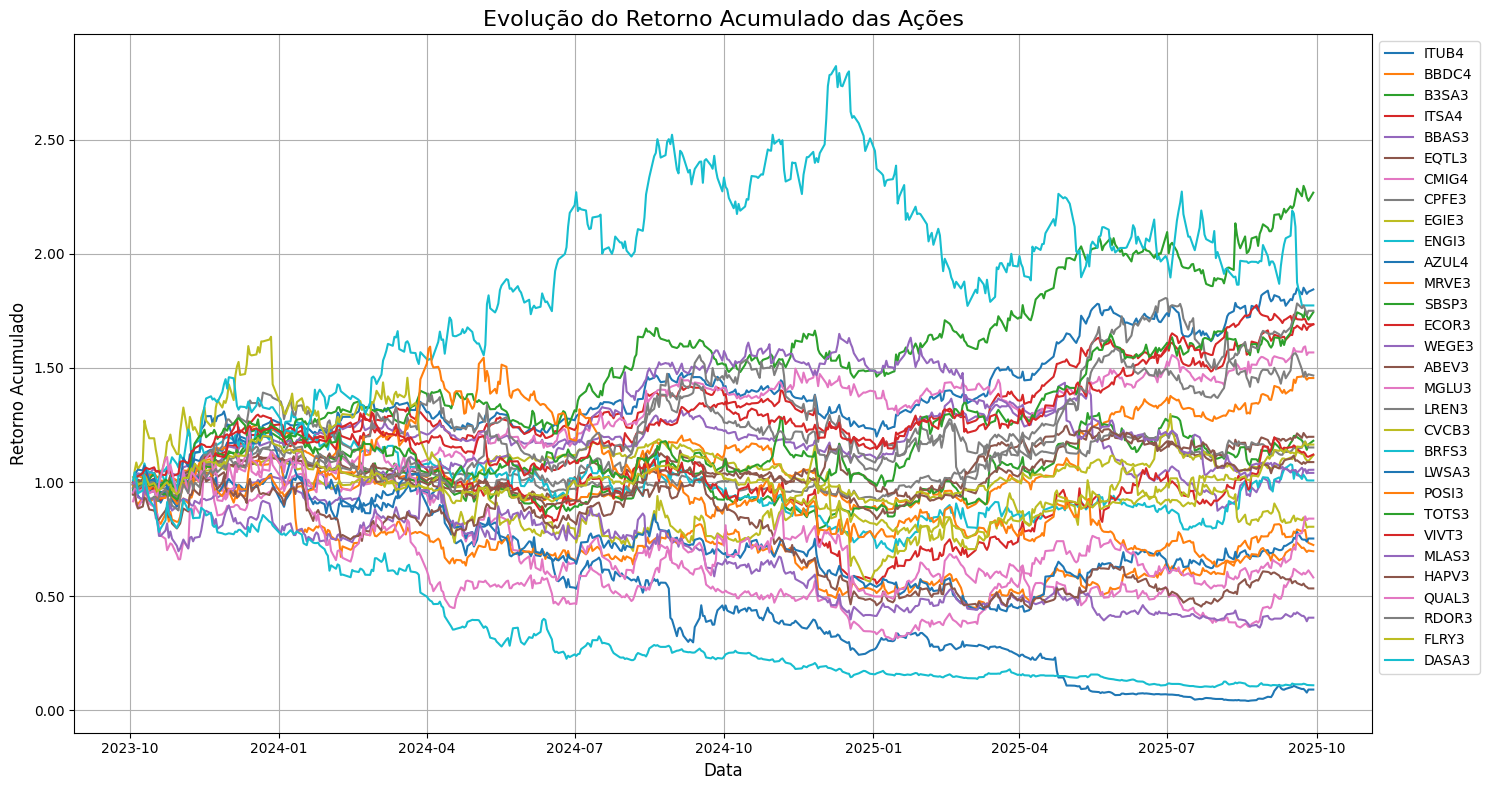


Gráfico salvo em 'dados\retornos_acoes_ibovespa_2024.png'


<Figure size 640x480 with 0 Axes>

In [4]:
# --- Adicionando o Gráfico de Retorno Acumulado ---
import matplotlib.pyplot as plt

# 1. Calcule o retorno acumulado
retorno_acumulado = (1 + retornos_diarios).cumprod()

# 2. Crie a figura e o eixo do gráfico
plt.figure(figsize=(15, 8))

# 3. Plote o gráfico
plt.plot(retorno_acumulado)

# 4. Adicione títulos e rótulos
plt.title('Evolução do Retorno Acumulado das Ações', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Acumulado', fontsize=12)
plt.grid(True)

# 5. Adicione a legenda com os nomes das ações
plt.legend(retorno_acumulado.columns, loc='upper left', bbox_to_anchor=(1, 1))

# 6. Melhore a formatação do eixo y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# 7. Ajuste o layout e mostre o gráfico
plt.tight_layout()
plt.show()

# 8. (Opcional) Salve o gráfico em um arquivo
try:
    caminho_completo_grafico = os.path.join(diretorio_destino, 'retornos_acoes_ibovespa_2024.png')
    plt.savefig(caminho_completo_grafico)
    print(f"\nGráfico salvo em '{caminho_completo_grafico}'")
except Exception as e:
    print(f"\nErro ao salvar o gráfico: {e}")

### Caracterização dos Ativos

Nesta seção apresentamos os indicadores de cada ativo utilizado na análise.  
Foram calculados:

- **Retorno médio anualizado** (média dos retornos diários multiplicada por 252 dias úteis).  
- **Risco anualizado** (desvio padrão dos retornos diários multiplicado pela raiz de 252).  

Além da tabela com as métricas, apresentamos um gráfico de dispersão **Retorno x Risco**,  
no qual cada ponto representa uma ação. Esse gráfico é importante para visualizar o trade-off entre risco e retorno.


,Retorno Médio Anual (%),Risco Anual (%),Setor
ITUB4,32.93,19.45,Financeiro
BBDC4,22.94,27.92,Financeiro
B3SA3,13.39,31.66,Financeiro
ITSA4,28.51,19.27,Financeiro
BBAS3,5.31,22.84,Financeiro
EQTL3,12.33,25.18,Energia
CMIG4,25.99,25.20,Energia
CPFE3,9.07,19.59,Energia
EGIE3,7.57,19.79,Energia
ENGI3,8.29,40.02,Energia


C:\Users\itsbe\AppData\Local\Temp\ipykernel_16504\2704583089.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (df_resumo["Risco Anual (%)"][i], df_resumo["Retorno Médio Anual (%)"][i]),


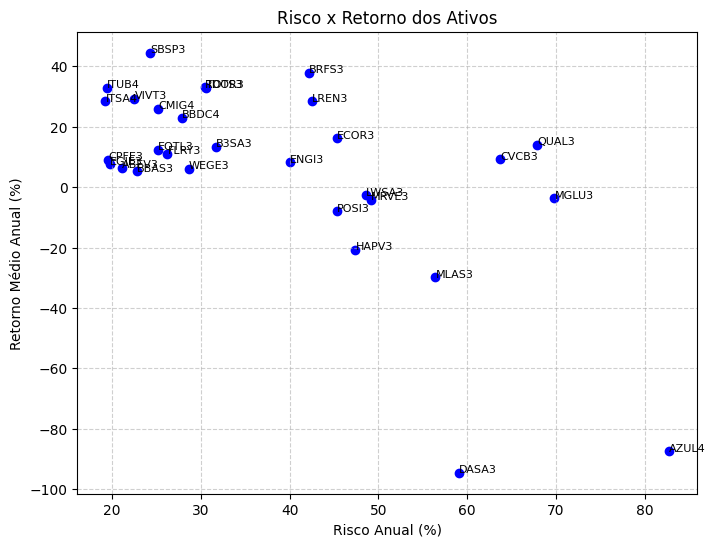

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cálculo do retorno médio anualizado e risco anualizado
retorno_medio_anual = retornos_diarios.mean() * 252
risco_anual = retornos_diarios.std() * np.sqrt(252)

# Cria DataFrame resumo
df_resumo = pd.DataFrame({
    "Retorno Médio Anual (%)": retorno_medio_anual * 100,
    "Risco Anual (%)": risco_anual * 100
}).round(2)

# Adiciona setor (a partir das listas de tickers que vocês já têm)
setores = {}
for t in tickers_Financeiro: setores[t.replace(".SA","")] = "Financeiro"
for t in tickers_Energia: setores[t.replace(".SA","")] = "Energia"
for t in tickers_Industriais: setores[t.replace(".SA","")] = "Industriais"
for t in tickers_Consumo: setores[t.replace(".SA","")] = "Consumo"
for t in tickers_Tecnologia: setores[t.replace(".SA","")] = "Tecnologia"
for t in tickers_Saude: setores[t.replace(".SA","")] = "Saúde"

df_resumo["Setor"] = df_resumo.index.map(setores)

# Mostra tabela
display(df_resumo)

# Gráfico Retorno x Risco
plt.figure(figsize=(8,6))
plt.scatter(df_resumo["Risco Anual (%)"], df_resumo["Retorno Médio Anual (%)"], c="blue")

# Adiciona rótulo de cada ação
for i, txt in enumerate(df_resumo.index):
    plt.annotate(txt, 
                 (df_resumo["Risco Anual (%)"][i], df_resumo["Retorno Médio Anual (%)"][i]),
                 fontsize=8)

plt.xlabel("Risco Anual (%)")
plt.ylabel("Retorno Médio Anual (%)")
plt.title("Risco x Retorno dos Ativos")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


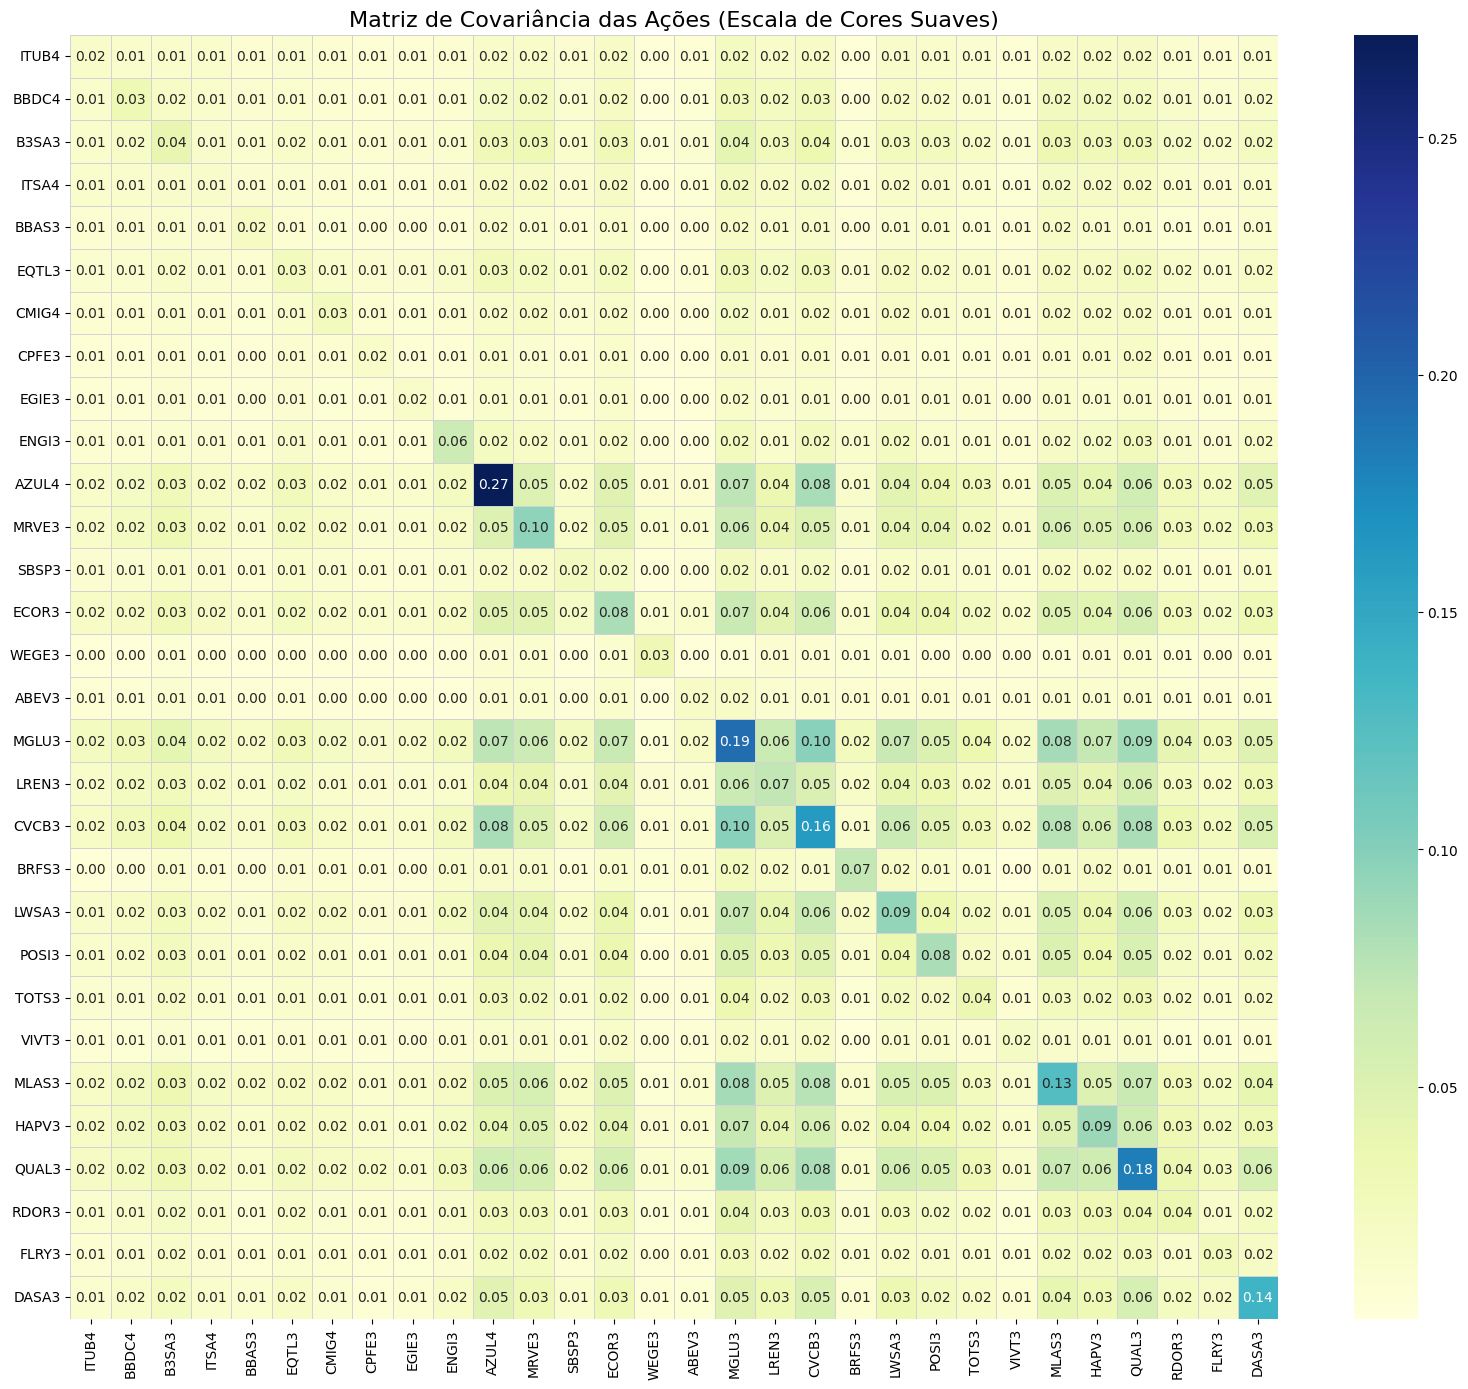


Matriz de covariância (heatmap) com cores suaves salva em 'dados\matriz_covariancia_heatmap_suave_2024.png'


<Figure size 640x480 with 0 Axes>

In [6]:
# --- Adicionando a Matriz de Variância e Covariância (Heatmap) com cores mais suaves ---
import seaborn as sns
import matplotlib.pyplot as plt # Certifique-se de que matplotlib.pyplot também está importado

if not retornos_diarios.empty:
    # 1. Calcule a matriz de covariância
    matriz_covariancia = retornos_diarios.cov()*100

    # 2. Crie a figura e o eixo para o mapa de calor
    plt.figure(figsize=(16, 14)) # Ajuste o tamanho conforme o número de ações

    # 3. Plote o mapa de calor com um colormap mais suave (ex: "YlGnBu", "Blues", "light:#0072B2")
    # 'cmap="YlGnBu"' é uma boa escolha para suavidade e progressão
    sns.heatmap(matriz_covariancia, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, linecolor='lightgray')

    # 4. Adicione título
    plt.title('Matriz de Covariância das Ações (Escala de Cores Suaves)', fontsize=16)
    plt.xticks(rotation=90) # Rotaciona os nomes das colunas para melhor leitura
    plt.yticks(rotation=0)  # Mantém os nomes das linhas na horizontal

    # 5. Ajuste o layout e mostre o gráfico
    plt.tight_layout()
    plt.show()

    # 6. (Opcional) Salve o gráfico em um arquivo
    try:
        caminho_completo_heatmap = os.path.join(diretorio_destino, 'matriz_covariancia_heatmap_suave_2024.png')
        plt.savefig(caminho_completo_heatmap)
        print(f"\nMatriz de covariância (heatmap) com cores suaves salva em '{caminho_completo_heatmap}'")
    except Exception as e:
        print(f"\nErro ao salvar o gráfico do heatmap com cores suaves: {e}")
else:
    print("\nNão foi possível gerar a matriz de covariância pois o DataFrame de retornos está vazio.")

## Otimização de Carteiras

Nesta seção aplicamos o modelo de Markowitz para determinar a composição ótima da carteira com base nos retornos e riscos dos ativos selecionados. 

Serão analisados dois cenários:

- **Cenário 1:** otimização considerando que o risco alvo seja igual à média dos riscos dos ativos, sem restrições adicionais além da soma dos pesos igual a 1.
- **Cenário 2:** otimização com risco alvo igual à metade da média dos riscos e com restrição de que nenhum ativo tenha participação superior a 4% da carteira.

O objetivo é comparar os dois cenários e avaliar como as restrições afetam a diversificação e o risco da carteira.


In [12]:
# colar o codigo aqui do cenario 1 e cenario 2

## Conclusão

Nos dois cenários, observamos como a teoria de Markowitz permite otimizar a alocação de ativos considerando o equilíbrio entre risco e retorno.

- No **Cenário 1**, sem restrições adicionais, a carteira tende a concentrar em ativos com maior retorno, mas mantendo o risco próximo à média.  
- No **Cenário 2**, ao impor um risco alvo menor e um limite de 4% por ativo, a carteira se torna mais **diversificada**, reduzindo a concentração, mas com impacto no retorno esperado.  

Essa análise mostra o **trade-off entre risco e retorno** e como restrições influenciam a composição da carteira. A fronteira eficiente surge exatamente dessa escolha entre diversificação e potencial de retorno.
